In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Dataset/HR_comma_sep.csv')

In [37]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [39]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [40]:
df.shape

(14999, 10)

In [41]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [42]:
retained = df[df.left == 0 ]
retained.shape

(11428, 10)

In [43]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

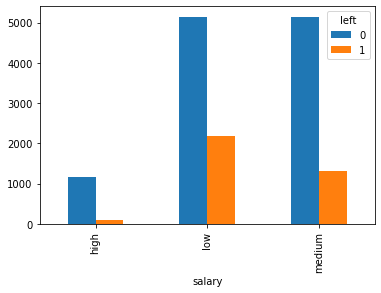

In [44]:
pd.crosstab(df.salary, df.left).plot(kind= 'bar')

<AxesSubplot:xlabel='sales'>

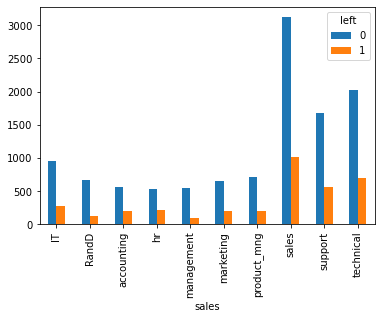

In [45]:
pd.crosstab(df.sales, df.left).plot(kind = 'bar')

In [46]:
data = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [47]:
salary_dummies = pd.get_dummies(data.salary, prefix = 'salary')

In [48]:
data1 = pd.concat([data, salary_dummies], axis = 'columns')

In [49]:
data1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [50]:
data1.drop('salary', axis = 1, inplace=True)

In [51]:
data1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [52]:
X = data1
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [53]:
y = df.left

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_predict = model.predict(X_test)

In [59]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
a_score = accuracy_score(y_test, y_predict)

In [62]:
a_score

0.7768888888888889

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cf_matrix = confusion_matrix(y_test, y_predict)

In [65]:
cf_matrix

array([[3216,  210],
       [ 794,  280]], dtype=int64)

In [66]:
cf_matrix.ravel()

array([3216,  210,  794,  280], dtype=int64)

In [67]:
import seaborn as sns

<AxesSubplot:>

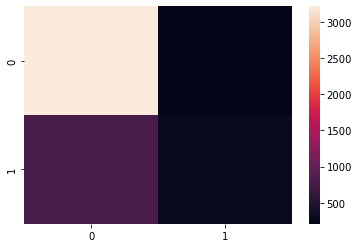

In [68]:
sns.heatmap(cf_matrix)